# US Accidents Exploratory Analysis

In [29]:
pip install opendatasets -U --quiet


/usr/bin/zsh: /mnt/stor/miniconda/envs/tf/lib/libncursesw.so.6: no version information available (required by /usr/bin/zsh)
Note: you may need to restart the kernel to use updated packages.


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

# Getting the dataset

In [31]:
'''
import opendatasets as od
url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?resource=download'
od.download(url) # Pre downloaded kaggle.json in the dir
'''

"\nimport opendatasets as od\nurl='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?resource=download'\nod.download(url) # Pre downloaded kaggle.json in the dir\n"

In [32]:
import os 
os.chdir('us-accidents')
x=os.listdir()
df_name=os.getcwd()+ "/"+str([i for i in os.listdir() if 'us_accidents' in i.lower()][0])
print(df_name)
os.chdir('..')

/home/ajdj/clones/exploratory-ds/us-accidents/US_Accidents_March23.csv


# Data preparation and Cleaning

In [33]:
import pandas as pd
df=pd.read_csv(df_name)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [35]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [36]:
numerics=['int16','int32','int64','float16','float32','float64']
num_df=df.select_dtypes(include=numerics)
len(num_df.columns)

13

In [37]:
missing=df.isna().sum().sort_values(ascending=False)/len(df)
missing=missing[missing>0]

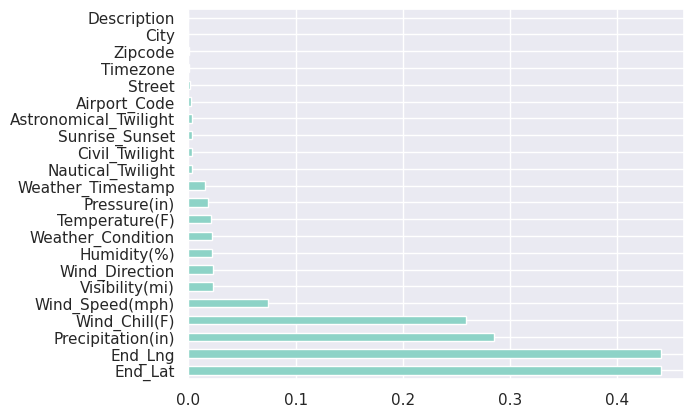

In [53]:
missing_plot=missing.plot(kind='barh')
missing_plot.figure.savefig('./charts/missing.png')

# Exploratory Analysis  

In [39]:
analysis=['Start_Time','City','Temperature(F)','Weather_Condition']

In [40]:
for i in analysis:
    uniques=len(df[i].unique())
    print(i,uniques)

Start_Time 6131796
City 13679
Temperature(F) 861
Weather_Condition 145


In [41]:
cities_by_accident=df.City.value_counts()
print('New York' in df.City) # we conclude there is no NY in the dataset

False


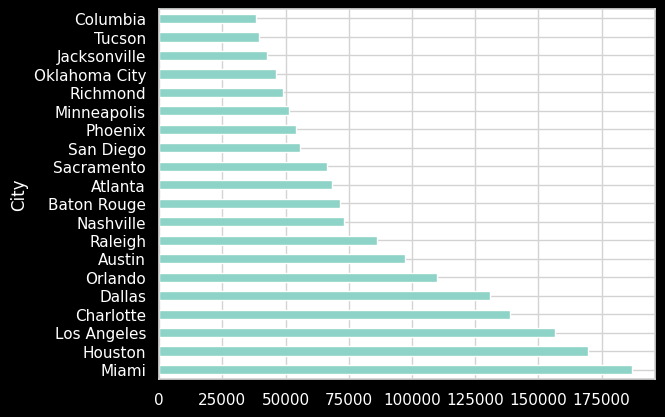

In [56]:
plot=cities_by_accident[:20].plot(kind='barh')
plot.figure.savefig('charts/cities_by_accident')

/mnt/stor/miniconda/envs/tf/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


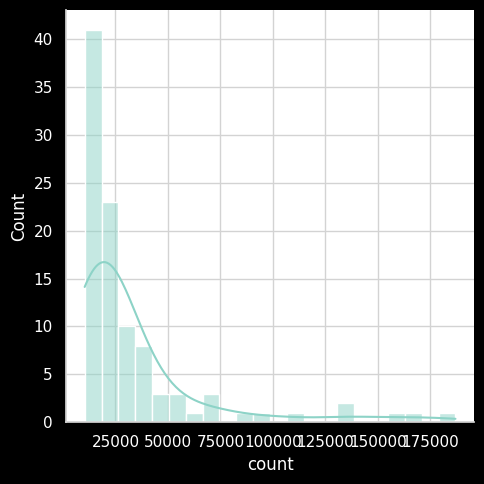

In [55]:
sns.displot(cities_by_accident[:100],kde=True)

In [44]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_acccident_cities=cities_by_accident[cities_by_accident<1000]